# Feature Engineering & Polynomial Regression

In [2]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

Lets try an example where the output is square of input. We would try first without feature engineering.

In [36]:
#functoin to predict y from x given parameters w and b
def hypothesis(x, w, b):
    return w * x + b

#calculate cost from current training set.
#x and y both are vetors here.
def calculate_cost(w, b, x, y):
    cost = 0.0
    m = x.size
    for i in range(m):
        y_hat = hypothesis(x[i], w, b)
        cost = cost + (y_hat - y[i])**2
    return cost/(2*m)    

def calculate_gradient(w, b, x, y):
    w_grad = 0.0
    b_grad = 0.0
    m = x.size
    for i in range(m):
        f_w_b = hypothesis(x[i], w, b)
        w_grad = w_grad + (f_w_b - y[i]) * x[i]
        b_grad = b_grad + (f_w_b - y[i])
    return (w_grad/m, b_grad/m)   

def gradient_decent(w, b, alpha, num_iter, x_train, y_train):
    cost_history = []
    for i in range(num_iter):
        (w_delta, b_delta) = calculate_gradient(w,b,x_train,y_train)
        w = w - alpha * w_delta
        b = b - alpha * b_delta
        cost_history.append(calculate_cost(w, b, x_train, y_train))
        if i % 100 == 0:
            print(f'Iteration {i} - Cost {cost_history[i]}')
    
    return (w,b, cost_history)



In [34]:
x = np.arange(0,20,1)
print(x)

y = 1 + x**2
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]


In [37]:
w,b,j = gradient_decent(0.0, 0.0, 1e-2, 1000, x, y)
print(w)
print(b)

Iteration 0 - Cost 1657.5632937500002
Iteration 100 - Cost 694.5491067092513
Iteration 200 - Cost 588.4754483004803
Iteration 300 - Cost 526.4137606474569
Iteration 400 - Cost 490.10264314551796
Iteration 500 - Cost 468.8576963175959
Iteration 600 - Cost 456.42768047748433
Iteration 700 - Cost 449.1551137331723
Iteration 800 - Cost 444.9000727315512
Iteration 900 - Cost 442.41052886595054
18.69806953562155
-52.08341025448667


In [38]:
predict_x = x * w + b
print(predict_x)

[-52.08341025 -33.38534072 -14.68727118   4.01079835  22.70886789
  41.40693742  60.10500696  78.80307649  97.50114603 116.19921557
 134.8972851  153.59535464 172.29342417 190.99149371 209.68956324
 228.38763278 247.08570232 265.78377185 284.48184139 303.17991092]


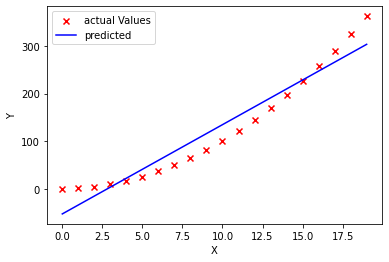

In [44]:
plt.scatter(x,y,marker="x",c="r",label="actual Values")
plt.plot(x, predict_x, c="b",label="predicted")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [56]:

def multi_bulk_predict(x_train, w, b):
    predict = []
    m = x_train.shape[0]
    
    for i in range(m):
        predict.append(multi_predict(x_train[i],w,b))
    return predict    

#Here x is the feature vector, w is the parameter vector and b is bias.
def multi_predict(x,w,b):
    return np.dot(x,w) + b

# xs is m training set for x
#y is output vector
#w is parameter vector and b is bias
def multi_compute_cost(xs, y, w, b):
    m = xs.shape[0]
    cost = 0.0
    for i in range(m):
        cost = cost + ( multi_predict(xs[i], w, b) - y[i])**2
    return cost / (2 * m)    

def multi_gradient(x_train, y_train, w, b):
    m,n = x_train.shape # n is number of features.
    
    w_delta = np.zeros((n,))
    b_delta = 0.0
    
    for i in range(m):
        err = multi_predict(x_train[i], w, b) - y_train[i]
        b_delta = b_delta + err 
        for j in range(n):
            w_delta[j] = w_delta[j] + err * x_train[i][j]
    
    return (w_delta/m, b_delta/m)
    
    
def multi_gradient_descent(x_train, y_train, w_in, b_in, a, num_iter):
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    j_history = []
    
    for i in range(num_iter):
        w_delta, b_delta = multi_gradient(x_train, y_train, w, b)
        w = w - a * w_delta
        b = b - a * b_delta
        cost = multi_compute_cost(x_train, y_train, w, b)
        j_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i:4d}: Cost {j_history[-1]:8.2f}   ")
    
    return (w,b, j_history)

Feature Engineering - 
Lets get another feature caled x**2

In [46]:
x2 = x**2
print(x2)

[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]


In [50]:
x_train = np.c_[x, x2]
print(x_train)
y_train = y
print(y_train)

[[  0   0]
 [  1   1]
 [  2   4]
 [  3   9]
 [  4  16]
 [  5  25]
 [  6  36]
 [  7  49]
 [  8  64]
 [  9  81]
 [ 10 100]
 [ 11 121]
 [ 12 144]
 [ 13 169]
 [ 14 196]
 [ 15 225]
 [ 16 256]
 [ 17 289]
 [ 18 324]
 [ 19 361]]
[  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]


[0. 0.]
Iteration    0: Cost 14110.59   
Iteration  100: Cost  8013.60   
Iteration  200: Cost  4551.06   
Iteration  300: Cost  2584.65   
Iteration  400: Cost  1467.91   
Iteration  500: Cost   833.70   
Iteration  600: Cost   473.53   
Iteration  700: Cost   268.98   
Iteration  800: Cost   152.82   
Iteration  900: Cost    86.85   
Iteration 1000: Cost    49.38   
Iteration 1100: Cost    28.11   
Iteration 1200: Cost    16.02   
Iteration 1300: Cost     9.16   
Iteration 1400: Cost     5.26   
Iteration 1500: Cost     3.05   
Iteration 1600: Cost     1.79   
Iteration 1700: Cost     1.08   
Iteration 1800: Cost     0.67   
Iteration 1900: Cost     0.44   
Iteration 2000: Cost     0.31   
Iteration 2100: Cost     0.24   
Iteration 2200: Cost     0.20   
Iteration 2300: Cost     0.17   
Iteration 2400: Cost     0.16   
Iteration 2500: Cost     0.15   
Iteration 2600: Cost     0.15   
Iteration 2700: Cost     0.14   
Iteration 2800: Cost     0.14   
Iteration 2900: Cost     0.14   
It

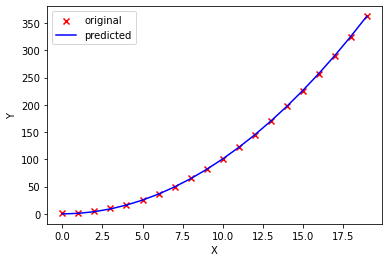

In [57]:
n = x_train.shape[1]
w_in = np.zeros(n)
print(w_in)
#iterations=10000, alpha=1e-7
w,b,j = multi_gradient_descent(x_train, y_train, w_in, 0.0, 1e-7, 10000)

x_predict = multi_bulk_predict(x_train, w, b)

plt.scatter(x,y,marker="x", c="r", label="original")
plt.plot(x,x_predict, c="b", label="predicted")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

As Gradient decent is slow - lets try feature scaling. Feature scaling becomes more important in case of polynomial regression. 

In [59]:
# X - 2-D Array - mxn where 
#m is number of training set and n is number of features.
def z_score_normalize(X):
    mu = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    return (x - mu) / std , mu, std

In [61]:
x_norm, mu, sigma = z_score_normalize(x_train)
w,b,j = multi_gradient_descent(x_train, y_train, w_in, 0.0, 1e-5, 1000)

Iteration    0: Cost  7305.57   
Iteration  100: Cost     0.14   
Iteration  200: Cost     0.14   
Iteration  300: Cost     0.14   
Iteration  400: Cost     0.14   
Iteration  500: Cost     0.14   
Iteration  600: Cost     0.13   
Iteration  700: Cost     0.13   
Iteration  800: Cost     0.13   
Iteration  900: Cost     0.13   


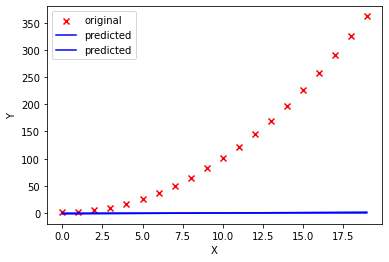

In [62]:
x_predict = multi_bulk_predict(x_norm, w, b)

plt.scatter(x,y,marker="x", c="r", label="original")
plt.plot(x,x_predict, c="b", label="predicted")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()